In [1]:
#------------------------ Importando as Bibliotecas --------------------------
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#------------------------ Files --------------------------
eletricity_generation = pd.read_excel('electricity_generation_total.xlsx')
energy_hydro = pd.read_excel('EnergyHydro.xls', sheet_name="Data", skiprows=3)
energy_oil = pd.read_excel("EnergyProductionOilSources.xls", sheet_name="Data", skiprows=3)
gdp = pd.read_excel("GDP_WorldBank.xls", sheet_name="Data", skiprows=3)
attendend_92 = pd.read_excel("PaisesParticipantes.xlsx")
green_energy = pd.read_excel("EnergyGreen.xls", sheet_name="Data", skiprows=3)
fossil_energy_consumption = pd.read_excel("fossilenergy.xls", sheet_name="Data", skiprows=3)

In [3]:
#---------------------------- Mudando o Indice -----------------------------
country_idx = attendend_92.set_index('Paises participantes')
energyhydro_idx = energy_hydro.set_index('Country Name')
energyoil_idx = energy_oil.set_index("Country Name")
greenenergy_idx = green_energy.set_index("Country Name")
fossil_consumption_idx = fossil_energy_consumption.set_index('Country Name')
gdp_idx = gdp.set_index('Country Name')
eletricity_generation_idx = eletricity_generation.set_index("country")

In [4]:
# ----------------------------- Filtração 1--------------------------- 
Energy_Hydro = energyhydro_idx[energyhydro_idx.columns[35:58]]
Energy_Oil = energyoil_idx[energyoil_idx.columns[35:58]]
Energy_Green = greenenergy_idx[greenenergy_idx.columns[35:58]]
Fossil_1 = fossil_consumption_idx[fossil_consumption_idx.columns[35:58]]
GDP = gdp_idx[gdp_idx.columns[35:58]]
Eletricity_Generation = eletricity_generation_idx[eletricity_generation_idx.columns[7:30]]

In [5]:
Eletricity_Generation.head(3)

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Algeria,18300000000,19400000000,19900000000,19700000000,20700000000,21500000000,23300000000,24800000000,25400000000,26600000000,...,33900000000,35200000000,37300000000,40200000000,43100000000,45700000000,53100000000,57400000000,59900000000,64200000000
Argentina,56500000000,61600000000,65500000000,68800000000,72900000000,77600000000,80300000000,86200000000,94400000000,95200000000,...,111000000000,113000000000,115000000000,129000000000,130000000000,133000000000,129000000000,136000000000,140000000000,142000000000
Australia,161000000000,165000000000,170000000000,175000000000,180000000000,189000000000,199000000000,207000000000,217000000000,224000000000,...,231000000000,238000000000,243000000000,245000000000,250000000000,251000000000,256000000000,251000000000,250000000000,247000000000


In [6]:
#Energy_Hydro.head(3)

In [7]:
#Energy_Oil.head(3)

In [8]:
#Energy_Green.head(3)

In [9]:
#Fossil_1.head(3)

In [10]:
#GDP.head(3)

In [11]:
#------------------------------------ Filtração 2 ------------------------------------------
EnergyOil = energyoil_idx.loc[:,[1992, "2014"]]
EnergyGreen = greenenergy_idx.loc[:,[1992, "2014"]]
EnergyHydro = energyhydro_idx.loc[:,[1992, "2014"]]
Fossil2 = fossil_consumption_idx.loc[:,[1992, "2014"]]
GDP2 = gdp_idx.loc[:,[1992, "2014"]]
Eletricity_Generation1 = eletricity_generation_idx.loc[:,[1992,"2014"]]



/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [109]:
paises_participantes = ["Afghanistan","Albania","Algeria","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Cuba",
                        "Cyprus","Korea, Rep.","Denmark","Djibouti","Dominica","Ecuador","Egypt, Arab Rep.","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Fiji",
                        "Finland","France","Gabon","Botswana","Brazil","Brunei Darussalam","Bulgaria","Burkina Faso",
                        "Burundi","Cambodia","Cameroon","Canada","Cabo Verde","Central African Republic","Chad","Chile","China","Colombia","Comoros","Costa Rica","Cote d'Ivoire","Lebanon","Lesotho","Liberia","Libya","Liechtenstein",
                        "Lithuania","Luxembourg","Madagascar","Malaysia","Maldives","Mali","Malta","Marshall Islands",
                        "Mauritania","Mauritius","Mexico","Monaco","Mongolia","Morocco","Gambia, The","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India",
                        "Indonesia","Iran, Islamic Rep.","Iraq","Ireland",
                        "Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Kuwait",
                        "Latvia","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Seychelles","Sierra Leone","Singapore","Slovenia","Solomon Islands","Spain","Sri Lanka","Sudan","Suriname","Sweden","Switzerland","Syrian Arab Republic",
                        "Thailand","Togo","Trinidad and Tobago","Mozambique","Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal",
                        "Qatar","Moldova","Romania","Russian Federation","Rwanda","St. Lucia","St. Vincent and the Grenadines","Samoa","Tunisia","Turkey","Tuvalu","Uganda","Ukraine","United Arab Emirates",
                        "United Kingdom","Tanzania","United States",
                        "Uruguay","Vanuatu","Venezuela, RB","Vietnam","Yemen, Rep.","Zimbabwe","Congo, Dem. Rep.","Congo, Rep."]

In [12]:
#Eletricity_Generation.head(2)

In [13]:
#EnergyOil.head(3)

In [14]:
#EnergyGreen.head(3)

In [15]:
#EnergyHydro.head(3)

In [16]:
#Fossil2.head(3)

In [17]:
#GDP2.head(3)

In [18]:
# ------------------------------ Junção dos dados ------------------------------ 
Energy_Oil_Join = country_idx.join(Energy_Oil, how='inner', lsuffix='_Country', rsuffix='_Energy')
Energy_Hydro_Join = country_idx.join(Energy_Hydro, how='inner', lsuffix='_Country', rsuffix='_EHydro')
Energy_Green_Join = country_idx.join(Energy_Green, how='inner', lsuffix='_Country', rsuffix='_EGreen')
Fossil_Join =  country_idx.join(Fossil_1, how='inner', lsuffix='_Country', rsuffix='_FossionC')
GDP3 = country_idx.join(GDP, how='inner', lsuffix='_Country', rsuffix='_GDP')
#Energy_Oil_Right = Energy_Oil.join(country_idx, how="outer", lsuffix='_Country', rsuffix='_EnergyOil')
Eletricity_Generation2 = country_idx.join(Eletricity_Generation,  how='inner', lsuffix='_Country', rsuffix='_Energy')

In [19]:
#Energy_Oil_Right.head(10)

In [20]:
#Energy_Oil_Join.head(10)

In [21]:
#Energy_Hydro_Join.head(3)

In [22]:
#Energy_Green_Join.head(3)

In [23]:
#Fossil_Join.head(3)

In [24]:
#GDP3.head(3)

In [25]:
#Eletricity_Generation2.head(3)

In [26]:
#------------------------ plotar ------------
y = Eletricity_Generation2
x = y.index

In [27]:
e = y.dropna()

In [28]:
clean_energy = Energy_Green_Join.dropna()

In [29]:
energia_total =e.T
energia_total.head()

,Argentina,Australia,Azerbaijan,Bangladesh,Egypt,Brazil,Canada,Chile,China,Mexico,...,Switzerland,Trinidad and Tobago,Netherlands,New Zealand,Peru,Philippines,Qatar,Romania,United Arab Emirates,Venezuela
1992,56500000000,161000000000,19700000000,8890000000,46700000000,242000000000,515000000000,22400000000,754000000000,132000000000,...,63600000000,3980000000,77200000000,32900000000,13100000000,25900000000,5180000000,54200000000,18700000000,67400000000
1993,61600000000,165000000000,19100000000,9210000000,48300000000,252000000000,525000000000,24000000000,812000000000,134000000000,...,65900000000,3820000000,77000000000,34300000000,14800000000,26600000000,5560000000,55500000000,21700000000,69400000000
1994,65500000000,170000000000,17600000000,9780000000,50400000000,260000000000,548000000000,25300000000,928000000000,146000000000,...,71500000000,4070000000,79700000000,34900000000,15900000000,30500000000,5850000000,55100000000,23700000000,71200000000
1995,68800000000,175000000000,17000000000,10800000000,53400000000,276000000000,551000000000,28000000000,1010000000000,150000000000,...,67800000000,4310000000,81100000000,36100000000,16900000000,33600000000,6010000000,59300000000,25000000000,73400000000
1996,72900000000,180000000000,17100000000,11500000000,56600000000,291000000000,566000000000,30800000000,1080000000000,157000000000,...,61200000000,4540000000,85200000000,36500000000,17300000000,36700000000,6620000000,61400000000,26600000000,75600000000


In [110]:
energia_verde_t = Energy_Green_Join.T
energia_verde_t.head()

AttributeError: 'list' object has no attribute 'T'

In [31]:
energia_total_media = Eletricity_Generation2.mean()
energia_verde_media = Energy_Green_Join.mean()


Text(0.5, 1.0, 'Média de geração de Energia Renóvavel (KWh)')

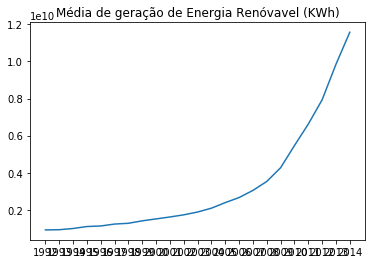

In [32]:
plt.plot(energia_verde_media,)
plt.title("Média de geração de Energia Renóvavel (KWh)")
# plt.rcParams["figure.figsize"] = [10,5]
# plt.rcParams["axes.titlesize"] = 10
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 10
# plt.rcParams["axes.labelsize"] = 10
# plt.rcParams["lines.markersize"] = 15

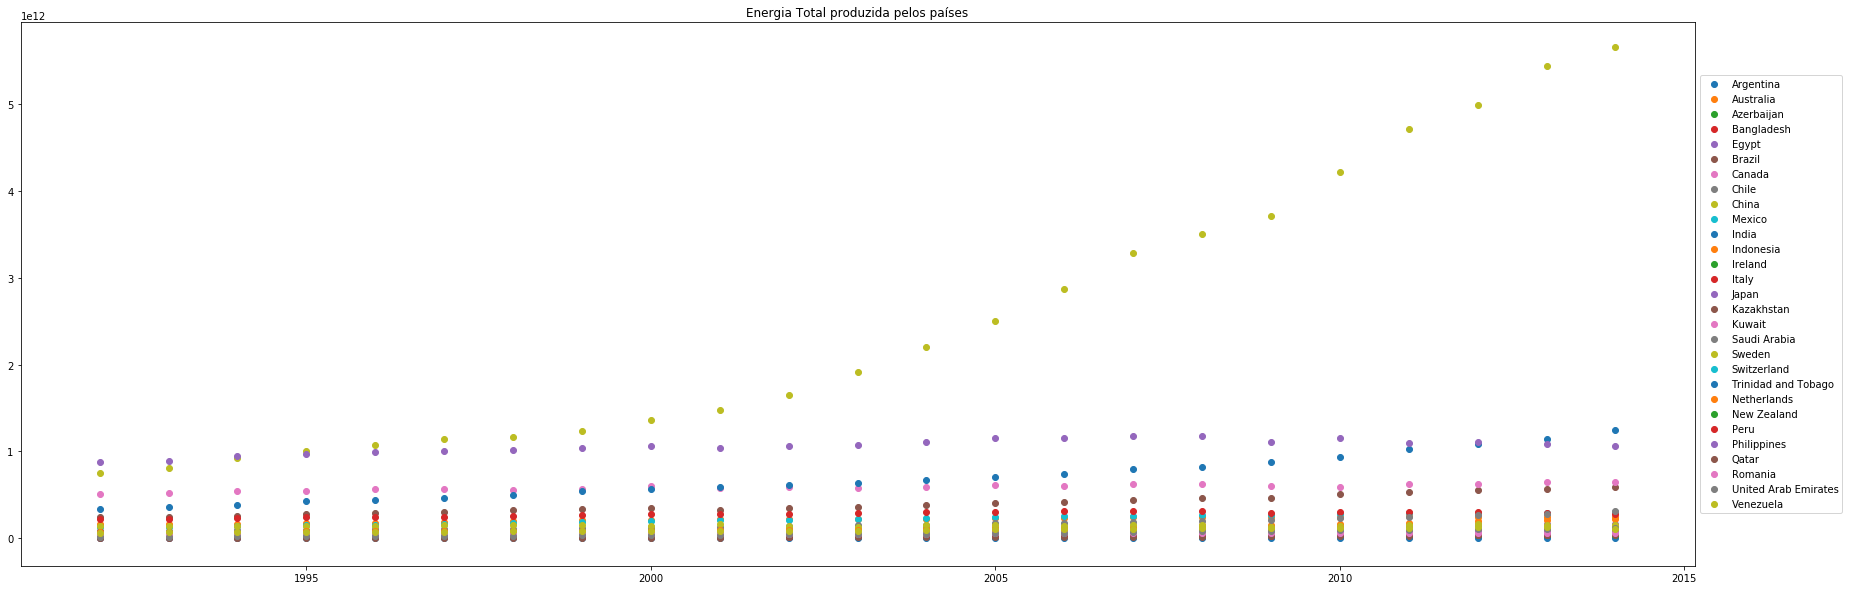

In [33]:
# Não percebi q era em porcentagem 
plt.figure(figsize=(30,10))

for pais in energia_total.columns:
    plt.scatter(x=energia_total.index, y=energia_total[pais])
plt.title("Energia Total produzida pelos países")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
#plt.plot(energia_total_media.index,  energia_total_media, color="r")
#plt.plot(energia_verde_media.index, energy_green_media, color="c")


In [34]:
    #energia_anos = energia
energia_verde = Energy_Green_Join.T
#enesrgia_verde

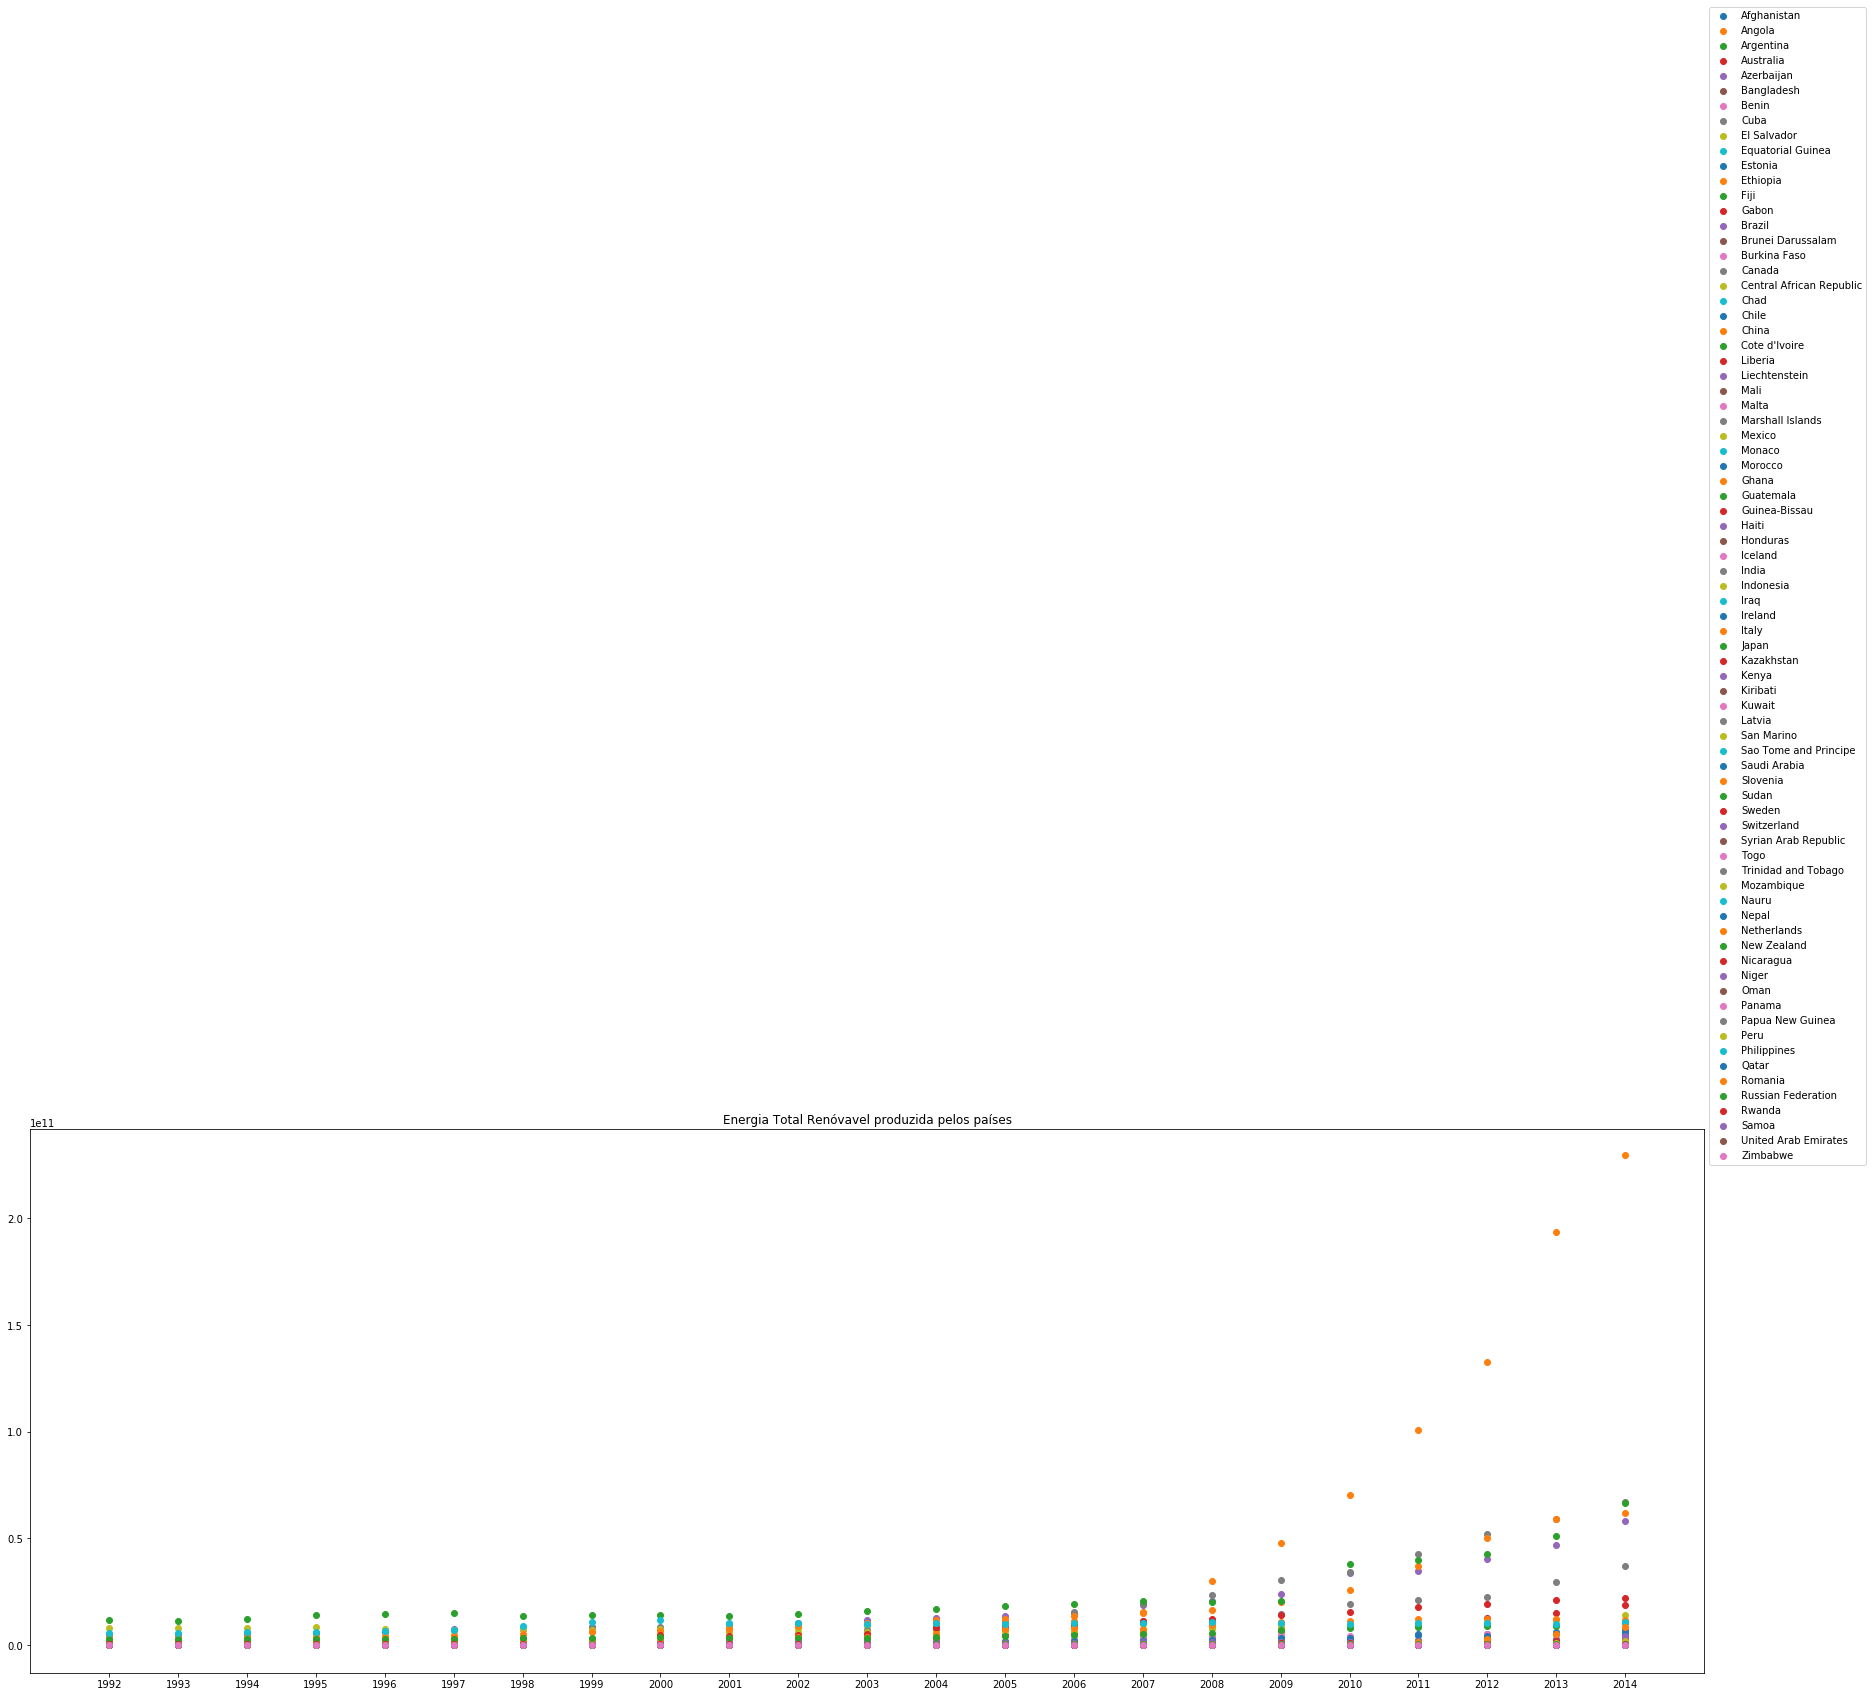

In [35]:
plt.figure(figsize=(30,10))
for pais in energia_verde.columns:
    plt.scatter(x=energia_verde.index, y=energia_verde[pais])
    plt.legend(loc="center left", bbox_to_anchor=(1,2))
    plt.title("Energia Total Renóvavel produzida pelos países")
    

In [108]:
# --------------------------------- ANALISE por região -----------------------------
# europa = ["Andorra",'Austria','Belgium','Bulgaria','Bosnia and Herzegovina','Channel Islands','Cyprus','Czech Republic','Germany',
#           'Denmark','Spain',  'Estonia', 'Finland','France','Faroe Islands','United Kingdom','Gibraltar','Greece','Croatia','Hungary',
#           'Isle of Man', 'Ireland',  'Iceland','Italy','Liechtenstein','Lithuania','Latvia','Monaco','Moldova','North Macedonia', 
#           'Malta','Montenegro', 'Netherlands','Poland','Portugal','Romania','Slovak Republic','Slovenia','Sweden','Turkey','Kosovo']
# america_north_central =["United States","Mexico","Canada","Guatemala","Cuba","Honduras","Nicaragua","El Salvador",
#                         "Costa Rica","Panama","Jamaica","Trinidad And Tobago","Belize","Barbados","Saint Lucia","Grenada","Saint Vincent And The Grenadines",
#                         "Antigua And Barbuda","Saint Kitts And Nevis"]
# america_south = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay",
#                  "Peru","Suriname","Uruguay","Venezuela"]
# asia =["China","Indonesia","Pakistan","Bangladesh","Japan","Philippines","Vietnam","Turkey","Iran","Thailand",
#        "Myanmar","South Korea","Iraq","Afghanistan","Saudi Arabia","Azerbaijan","Uzbekistan","Malaysia",
#        "Yemen","Nepal","North Korea","Sri Lanka","Kazakhstan","Syria","Cambodia","Jordan","United Arab Emirates",
#        "Tajikistan","Israel","Laos","Lebanon","Kyrgyzstan","Turkmenistan","Singapora","State of Palestine","Oman","Kuwait","Georgia","Mongolia","Armenia",
#        "Qatar","Bahrain","Cyprus","Maldives","Brunei"]
# africa =["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon",
#          "Cape Verde","Central African Republic","Chad","Comoros","Congo","Djibouti","Egypt","Equatorial Guinea","Eritrea","Ethiopia","Gabon",
#          "Gambia","Ghana","Guinea","Guinea-Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi","Mali","Mauritania",
#          "Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria","Rwanda","São Tomé and Príncipe","Senegal",
#          "Seychelles","Sierra Leone","Somalia","South Africa","Sudan","South Sudan","Swaziland",
#          "Tanzania","Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

paises_participantes = ["Afghanistan","Albania","Algeria","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Cuba",
                        "Cyprus","Korea, Rep.","Denmark","Djibouti","Dominica","Ecuador","Egypt, Arab Rep.","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Fiji",
                        "Finland","France","Gabon","Botswana","Brazil","Brunei Darussalam","Bulgaria","Burkina Faso",
                        "Burundi","Cambodia","Cameroon","Canada","Cabo Verde","Central African Republic","Chad","Chile","China","Colombia","Comoros","Costa Rica","Cote d'Ivoire","Lebanon","Lesotho","Liberia","Libya","Liechtenstein",
                        "Lithuania","Luxembourg","Madagascar","Malaysia","Maldives","Mali","Malta","Marshall Islands",
                        "Mauritania","Mauritius","Mexico","Monaco","Mongolia","Morocco","Gambia, The","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India",
                        "Indonesia","Iran, Islamic Rep.","Iraq","Ireland",
                        "Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Kuwait",
                        "Latvia","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Seychelles","Sierra Leone","Singapore","Slovenia","Solomon Islands","Spain","Sri Lanka","Sudan","Suriname","Sweden","Switzerland","Syrian Arab Republic",
                        "Thailand","Togo","Trinidad and Tobago","Mozambique","Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal",
                        "Qatar","Moldova","Romania","Russian Federation","Rwanda","St. Lucia","St. Vincent and the Grenadines","Samoa","Tunisia","Turkey","Tuvalu","Uganda","Ukraine","United Arab Emirates",
                        "United Kingdom","Tanzania","United States",
                        "Uruguay","Vanuatu","Venezuela, RB","Vietnam","Yemen, Rep.","Zimbabwe","Congo, Dem. Rep.","Congo, Rep."]

In [106]:
Energy_Green.loc[:,"Paises"] = "não"
GDP2.loc[:,"Paises"] = "não"
#Energy_Green["Paises"]

In [107]:
Energy_Green.loc[paises_participantes, "Paises"] = "sim"
GDP2.loc[paises_participantes,"Paises"] = "sim"
#Energy_Green["Paises"]

KeyError: "['Yugoslavia' 'Zaire'] not in index"

In [59]:
Energy_Green.Paises.value_counts()

não    264
Name: Paises, dtype: int64

In [60]:
GDP2.Paises.value_counts()

não    264
Name: Paises, dtype: int64

In [ ]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2010"], GDP2.loc[GDP2.Paises=="não", "2010"], color="b")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2010"], GDP2.loc[GDP2.Paises=="sim", "2010"], color="r")


In [ ]:
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="não","2014"], GDP2.loc[GDP2.Paises=="não", "1992"], color="b")
plt.scatter(Energy_Green.loc[Energy_Green.Paises=="sim","2014"], GDP2.loc[GDP2.Paises=="sim", "1992"], color="r")


In [ ]:
Energy_Green.boxplot(column="2014", by="Europa")

In [ ]:
# dados = EnergyGreen + Fossil2 + GDP2 + Eletricity_Generation1
# dados

In [ ]:
# plt.figure(figsize=(30,10))
# media_attendend = Energy_Green_Join.mean()
# while i<len(europa):
#     if attenend_92[i]==
#         plt.scatter(x=energia_verde.index, y=energia_verde[country])
#         plt.legend(loc="left center", bbox_to_anchor=(1,2))
#         plt.title("Energia Renovável produzida pelos países participantes")
#     else: 
#         plt.scatter(x=energia_verde.index, y=energia_verde[country])
#         plt.legend(loc="left center", bbox_to_anchor=(1,2))
#         plt.title("Energia Renovável de países, não participantes das conferências")
#     i+=1
# plt.plot()